In [2]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Users/jildiz/opt/anaconda3/lib/python3.8/site-packages (0.0)
You should consider upgrading via the '/Users/jildiz/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [3]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

You should consider upgrading via the '/Users/jildiz/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import datetime as dt

# Read the CSV and Perform Basic Data Cleaning

In [5]:
df1 = pd.read_csv("csv/POP.csv")
# Drop the null columns where all values are null
# df1 = df1.dropna(axis='columns', how='all')
# # Drop the null rows
df1 = df1.dropna()
df1= df1.drop(columns=['realtime_start','realtime_end'])
#Rearrange columns as other csv files
df1= df1[['date', 'value']]
df1=df1.rename(columns={"value": "population"})
#df1= df1['date'].dt.strftime('%m-%Y')
df1['date'] = pd.to_datetime(df1['date'])
df1['date'] = df1['date'].dt.strftime('%b-%y')
# Dropping some rows so that data starts with 1973
new_df1=df1.drop(df1.index[0:252])
population=new_df1.reset_index(drop=True)
population.tail(10)
# df1.head(265)

,date,population
554,Mar-19,328742.843
555,Apr-19,328890.250
556,May-19,329047.319
557,Jun-19,329213.989
558,Jul-19,329394.993
559,Aug-19,329591.333
560,Sep-19,329785.872
561,Oct-19,329982.035
562,Nov-19,330154.949
563,Dec-19,330309.946


In [6]:
imports = pd.read_csv("csv/Crude_Oil_Imports_Total_Monthly.csv")
# Drop the null columns where all values are null
imports = imports.dropna(axis='columns', how='all')
# Drop the null rows
imports = imports.dropna()
#Delete unwanted rows
imports= imports.iloc[:-8]
imports=imports.rename(columns={"Month": "date"})
imports = imports.sort_index(ascending=False)
imports= imports.reset_index(drop=True)
imports.head()

,date,Crude Oil Imports Total Monthly
0,Sep-73,3470.567
1,Oct-73,3738.871
2,Nov-73,3452.333
3,Dec-73,2891.387
4,Jan-74,2381.903


In [7]:
df3 = pd.read_csv("csv/Total_Fossil_Fuels_Consumption_Monthly.csv")
# Drop the null columns where all values are null
df3 = df3.dropna(axis='columns', how='all')
# Drop the null rows
df3=df3.rename(columns={"Month": "date"})
df3 = df3.sort_index(ascending=False)
consumption= df3.reset_index(drop=True)
consumption= consumption.iloc[:-6]
consumption.tail()

,date,Total Fossil Fuel Consumption
559,Aug-19,6863.376
560,Sep-19,6275.155
561,Oct-19,6369.513
562,Nov-19,6777.768
563,Dec-19,7196.766


In [8]:
df4 = pd.read_csv("csv/Crude_Oil_Export_Monthly_1973-2020.csv")
# Drop the null columns where all values are null
df4 = df4.dropna(axis='columns', how='all')
df4 = df4.rename(columns={"Date": "date"})
# Drop the null rows
exports = df4.dropna()

#Delete unwanted rows
exports= exports.iloc[:-2]

#Converting and formating date column
exports['date'] = pd.to_datetime(exports['date'])
exports['date'] = exports['date'].dt.strftime('%b-%y')
exports

,date,U.S. Exports of Crude Oil (Thousand Barrels)
0,Jan-73,0
1,Feb-73,0
2,Mar-73,0
3,Apr-73,0
4,May-73,128
...,...,...
565,Feb-20,107528
566,Mar-20,110262
567,Apr-20,92315
568,May-20,90787


In [9]:
df5 = pd.read_csv("csv/U.S._Field_Production_of_Crude_Oil_1973-2020.csv")
# Drop the null columns where all values are null
df5 = df5.dropna(axis='columns', how='all')
df5 = df5.rename(columns={"Month": "date"})
# Drop the null rows
df5 = df5.dropna()
#Delete unwanted rows
production= df5.iloc[:-2]
production

,date,U.S. Field Production of Crude Oil Thousand Barrels
0,Aug-20,327957
1,Jul-20,340375
2,Jun-20,313264
3,May-20,310582
4,Apr-20,360299
...,...,...
565,Jul-73,285731
566,Jun-73,276418
567,May-73,287134
568,Apr-73,278757


## Joining Data

In [10]:
merge1= pd.merge(consumption, imports, on="date")
merge1

,date,Total Fossil Fuel Consumption,Crude Oil Imports Total Monthly
0,Sep-73,5376.782,3470.567
1,Oct-73,5765.300,3738.871
2,Nov-73,6088.440,3452.333
3,Dec-73,6388.515,2891.387
4,Jan-74,6378.043,2381.903
...,...,...,...
551,Aug-19,6863.376,6944.290
552,Sep-19,6275.155,6482.833
553,Oct-19,6369.513,6241.710
554,Nov-19,6777.768,5817.700


In [11]:
merge2= pd.merge(merge1, exports, on="date")
merge2

,date,Total Fossil Fuel Consumption,Crude Oil Imports Total Monthly,U.S. Exports of Crude Oil (Thousand Barrels)
0,Sep-73,5376.782,3470.567,160
1,Oct-73,5765.300,3738.871,0
2,Nov-73,6088.440,3452.333,0
3,Dec-73,6388.515,2891.387,177
4,Jan-74,6378.043,2381.903,534
...,...,...,...,...
551,Aug-19,6863.376,6944.290,85406
552,Sep-19,6275.155,6482.833,92780
553,Oct-19,6369.513,6241.710,105770
554,Nov-19,6777.768,5817.700,92408


In [12]:
merge3= pd.merge(merge2, production, on="date")
merge3

,date,Total Fossil Fuel Consumption,Crude Oil Imports Total Monthly,U.S. Exports of Crude Oil (Thousand Barrels),U.S. Field Production of Crude Oil Thousand Barrels
0,Sep-73,5376.782,3470.567,160,271959
1,Oct-73,5765.300,3738.871,0,285940
2,Nov-73,6088.440,3452.333,0,274829
3,Dec-73,6388.515,2891.387,177,280960
4,Jan-74,6378.043,2381.903,534,276950
...,...,...,...,...,...
551,Aug-19,6863.376,6944.290,85406,385168
552,Sep-19,6275.155,6482.833,92780,374856
553,Oct-19,6369.513,6241.710,105770,392849
554,Nov-19,6777.768,5817.700,92408,385793


In [13]:
import numpy as np
merge4= pd.merge(merge3, population, on="date")
merge4= merge4.round({'population': 0}) 
merge4= merge4.round({'Total Fossil Fuel Consumption': 0}) 
merge4= merge4.round({'Crude Oil Imports Total Monthly': 0}) 

merge4

,date,Total Fossil Fuel Consumption,Crude Oil Imports Total Monthly,U.S. Exports of Crude Oil (Thousand Barrels),U.S. Field Production of Crude Oil Thousand Barrels,population
0,Sep-73,5377.0,3471.0,160,271959,212289.0
1,Oct-73,5765.0,3739.0,0,285940,212475.0
2,Nov-73,6088.0,3452.0,0,274829,212634.0
3,Dec-73,6389.0,2891.0,177,280960,212785.0
4,Jan-74,6378.0,2382.0,534,276950,212932.0
...,...,...,...,...,...,...
551,Aug-19,6863.0,6944.0,85406,385168,329591.0
552,Sep-19,6275.0,6483.0,92780,374856,329786.0
553,Oct-19,6370.0,6242.0,105770,392849,329982.0
554,Nov-19,6778.0,5818.0,92408,385793,330155.0


In [14]:
#Renaming Columns
all_df = merge4.rename(columns={"date": "Date",
                               "Total Fossil Fuel Consumption":"Fossil Fuel Consumption",
                               "Crude Oil Imports Total Monthly": "Crude Oil Imports",
                              "U.S. Exports of Crude Oil (Thousand Barrels)": "Crude Oil Exports(1000 Barrels)",
                              "U.S. Field Production of Crude Oil Thousand Barrels":"Crude Oil Production (1000 Barrels)",
                               "population": "US Population"})
all_df

,Date,Fossil Fuel Consumption,Crude Oil Imports,Crude Oil Exports(1000 Barrels),Crude Oil Production (1000 Barrels),US Population
0,Sep-73,5377.0,3471.0,160,271959,212289.0
1,Oct-73,5765.0,3739.0,0,285940,212475.0
2,Nov-73,6088.0,3452.0,0,274829,212634.0
3,Dec-73,6389.0,2891.0,177,280960,212785.0
4,Jan-74,6378.0,2382.0,534,276950,212932.0
...,...,...,...,...,...,...
551,Aug-19,6863.0,6944.0,85406,385168,329591.0
552,Sep-19,6275.0,6483.0,92780,374856,329786.0
553,Oct-19,6370.0,6242.0,105770,392849,329982.0
554,Nov-19,6778.0,5818.0,92408,385793,330155.0


In [15]:
all_df.columns

Index(['Date', 'Fossil Fuel Consumption', 'Crude Oil Imports',
       'Crude Oil Exports(1000 Barrels)',
       'Crude Oil Production (1000 Barrels)', 'US Population'],
      dtype='object')

In [16]:
all_df.corr()

,Fossil Fuel Consumption,Crude Oil Imports,Crude Oil Exports(1000 Barrels),Crude Oil Production (1000 Barrels),US Population
Fossil Fuel Consumption,1.000000,0.690044,0.076525,-0.403376,0.604329
Crude Oil Imports,0.690044,1.000000,-0.026016,-0.647171,0.740344
Crude Oil Exports(1000 Barrels),0.076525,-0.026016,1.000000,0.665797,0.389665
Crude Oil Production (1000 Barrels),-0.403376,-0.647171,0.665797,1.000000,-0.210860
US Population,0.604329,0.740344,0.389665,-0.210860,1.000000


NameError: name 'plt' is not defined

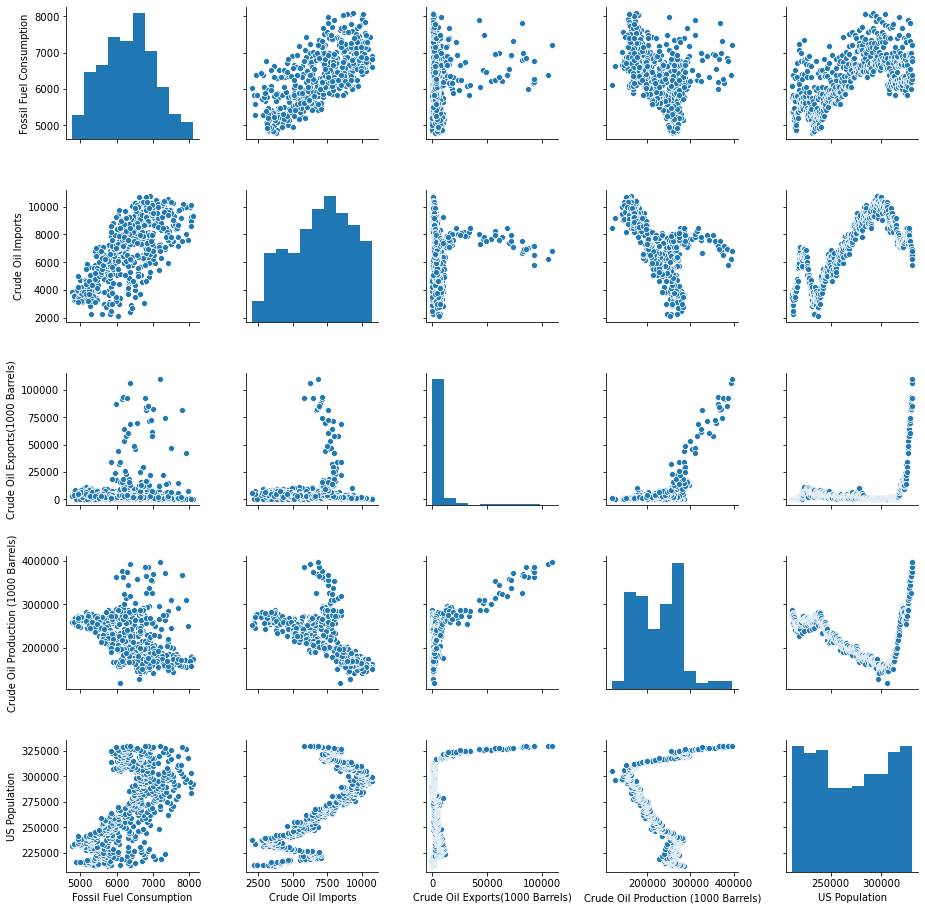

In [17]:
import seaborn as sns
df = all_df[['Fossil Fuel Consumption', 'Crude Oil Imports',
       'Crude Oil Exports(1000 Barrels)',
       'Crude Oil Production (1000 Barrels)', 'US Population']]

sns.pairplot(df, kind="scatter")
plt.show()

In [ ]:
from numpy import percentile
column=all_df['Fossil Fuel Consumption']
# calculate quartiles
quartiles = percentile(column, [25, 50, 75])
# calculate min/max
data_min, data_max = column.min(), column.max()
# print 5-number summary
print('Min Oil Consumption: %.3f' % data_min)
print('Q1 Oil Consumption: %.3f' % quartiles[0])
print('Median Oil Consumption: %.3f' % quartiles[1])
print('Q3 Oil Consumption: %.3f' % quartiles[2])
print('Max Oil Consumption: %.3f' % data_max)


In [18]:
all_df.dtypes

Date                                    object
Fossil Fuel Consumption                float64
Crude Oil Imports                      float64
Crude Oil Exports(1000 Barrels)          int64
Crude Oil Production (1000 Barrels)      int64
US Population                          float64
dtype: object

In [50]:
#Renaming a column for simplicity reason
all_df=all_df.rename(columns={"Fossil Fuel Consumption": "Consumption"})
#Find the difference between consecutive consumption rows
all_df["Consumption Change"] = all_df["Consumption"].diff(1)
#Create another dummy variable (binary value) to create categorical value (1=increase, 0=decrease)
all_df['Consumption Change (Y/N)'] = np.where(all_df['Consumption Change'] > 0, 1, 0)
#Export to CSV
all_df.to_csv("all_df.csv")
all_df=all_df.reset_index()
all_df

,Date,Consumption,Crude Oil Imports,Crude Oil Exports(1000 Barrels),Crude Oil Production (1000 Barrels),US Population,Consumption Change,Consumption Change (Y/N)
0,Sep-73,5377.0,3471.0,160,271959,212289.0,NaN,0
1,Oct-73,5765.0,3739.0,0,285940,212475.0,388.0,1
2,Nov-73,6088.0,3452.0,0,274829,212634.0,323.0,1
3,Dec-73,6389.0,2891.0,177,280960,212785.0,301.0,1
4,Jan-74,6378.0,2382.0,534,276950,212932.0,-11.0,0
...,...,...,...,...,...,...,...,...
551,Aug-19,6863.0,6944.0,85406,385168,329591.0,39.0,1
552,Sep-19,6275.0,6483.0,92780,374856,329786.0,-588.0,0
553,Oct-19,6370.0,6242.0,105770,392849,329982.0,95.0,1
554,Nov-19,6778.0,5818.0,92408,385793,330155.0,408.0,1


In [61]:
all_df['Date'] = pd.to_datetime(all_df['Date'], format='%b-%y')
# all_df['Date'] = all_df['Date'].dt.strftime('%Y-%B')
# # all_df=pd.to_datetime(all_df["Date"]).dt.date
all_df= all_df.set_index('Date')
all_df


,Consumption,Crude Oil Imports,Crude Oil Exports(1000 Barrels),Crude Oil Production (1000 Barrels),US Population,Consumption Change,Consumption Change (Y/N)
Date,,,,,,,
1973-09-01,5377.0,3471.0,160,271959,212289.0,NaN,0
1973-10-01,5765.0,3739.0,0,285940,212475.0,388.0,1
1973-11-01,6088.0,3452.0,0,274829,212634.0,323.0,1
1973-12-01,6389.0,2891.0,177,280960,212785.0,301.0,1
1974-01-01,6378.0,2382.0,534,276950,212932.0,-11.0,0
...,...,...,...,...,...,...,...
2019-08-01,6863.0,6944.0,85406,385168,329591.0,39.0,1
2019-09-01,6275.0,6483.0,92780,374856,329786.0,-588.0,0
2019-10-01,6370.0,6242.0,105770,392849,329982.0,95.0,1


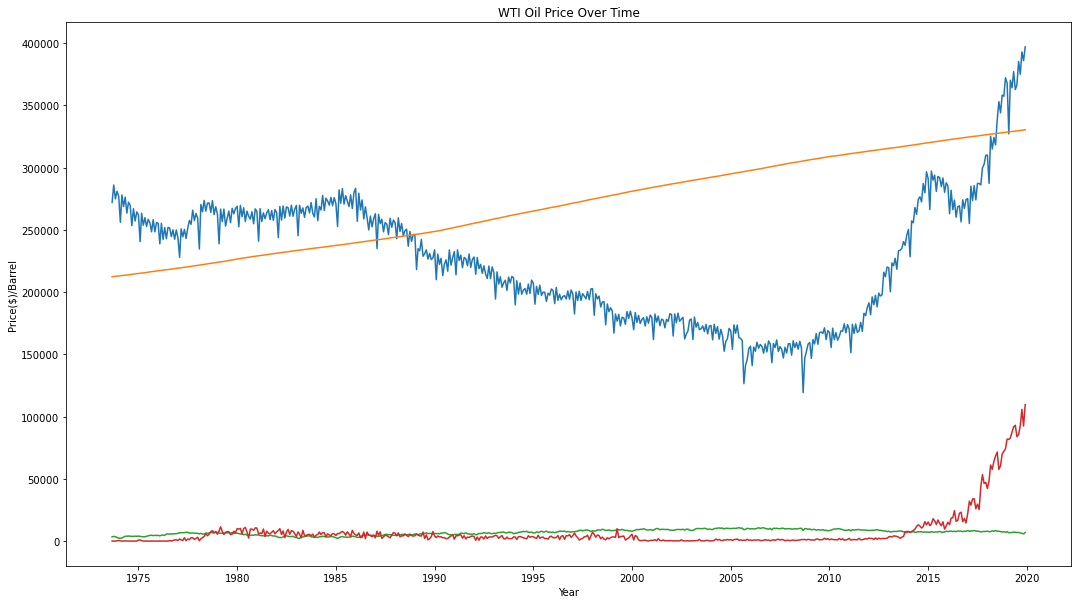

In [102]:
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Features Behavior Over Time')
plt.plot(all_df[['Crude Oil Production (1000 Barrels)','US Population',
         'Crude Oil Imports','Crude Oil Exports(1000 Barrels)']])
plt.rcParams["figure.figsize"] = [15,8]

## Create A Train Test Split

In [63]:
y = all_df['Consumption Change (Y/N)']

In [107]:
# Set features. This will also be used as your x values.
X = all_df[['Crude Oil Production (1000 Barrels)','US Population',
         'Crude Oil Imports','Crude Oil Exports(1000 Barrels)']]

In [108]:
#Split train and test periods manually since we are dealing with date
# create train test partition
y_train, X_train = y[:472],X[:472]
y_test, X_test  = y[472:555],X[472:555]
print('Train Dataset:',train.shape)
print('Test Dataset:',test.shape)
# from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, shuffle=False)


Train Dataset: (472, 7)
Test Dataset: (83, 7)


In [109]:
X_train.head()

,Crude Oil Production (1000 Barrels),US Population,Crude Oil Imports,Crude Oil Exports(1000 Barrels)
Date,,,,
1973-09-01,271959,212289.0,3471.0,160
1973-10-01,285940,212475.0,3739.0,0
1973-11-01,274829,212634.0,3452.0,0
1973-12-01,280960,212785.0,2891.0,177
1974-01-01,276950,212932.0,2382.0,534


## Pre-Processing

In [110]:
#Scale data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X.shape

(556, 4)

In [111]:
y.shape

(556,)

## Train the Model with Different SVC

# 1. Linear

In [112]:
from sklearn.svm import SVC 
model1 = SVC(kernel='linear')
model1.fit(X_train_scaled, y_train)
print(f"Training Data Score: {model1.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model1.score(X_test_scaled, y_test)}")

Training Data Score: 0.5550847457627118
Testing Data Score: 0.6144578313253012


## 2.Model RBF

In [113]:
# Create the SVC Model
from sklearn.svm import SVC 
model2 = SVC(kernel='rbf')
model2.fit(X_train_scaled,y_train)
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

Training Data Score: 0.625
Testing Data Score: 0.40963855421686746


## 3.Model Poly

In [114]:
model3 = SVC(kernel='poly')
model3.fit(X_train_scaled,y_train)
print(f"Training Data Score: {model3.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model3.score(X_test_scaled, y_test)}")

Training Data Score: 0.663135593220339
Testing Data Score: 0.4578313253012048


## 4. Decision Tree Classifier

In [115]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
model4 = clf.fit(X_train, y_train)
model4.score(X_test, y_test)

0.6024096385542169

## 5. Random ForestClassifier

In [116]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
model5 = rf.fit(X_train, y_train)
model5.score(X_test, y_test)

0.6144578313253012

## 6. Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression
model6 = LogisticRegression()
model6.fit(X_train, y_train)
print(f"Training Data Score: {model6.score(X_train, y_train)}")
print(f"Testing Data Score: {model6.score(X_test, y_test)}")


Training Data Score: 0.559322033898305
Testing Data Score: 0.40963855421686746


## 7. KNN Model

In [118]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    

k: 1, Train/Test Score: 1.000/0.386
k: 3, Train/Test Score: 0.788/0.398
k: 5, Train/Test Score: 0.744/0.410
k: 7, Train/Test Score: 0.706/0.422
k: 9, Train/Test Score: 0.686/0.434
k: 11, Train/Test Score: 0.689/0.410
k: 13, Train/Test Score: 0.633/0.458
k: 15, Train/Test Score: 0.614/0.470
k: 17, Train/Test Score: 0.593/0.434
k: 19, Train/Test Score: 0.591/0.578
k: 21, Train/Test Score: 0.583/0.458
k: 23, Train/Test Score: 0.574/0.470
k: 25, Train/Test Score: 0.587/0.458
k: 27, Train/Test Score: 0.570/0.422
k: 29, Train/Test Score: 0.583/0.422


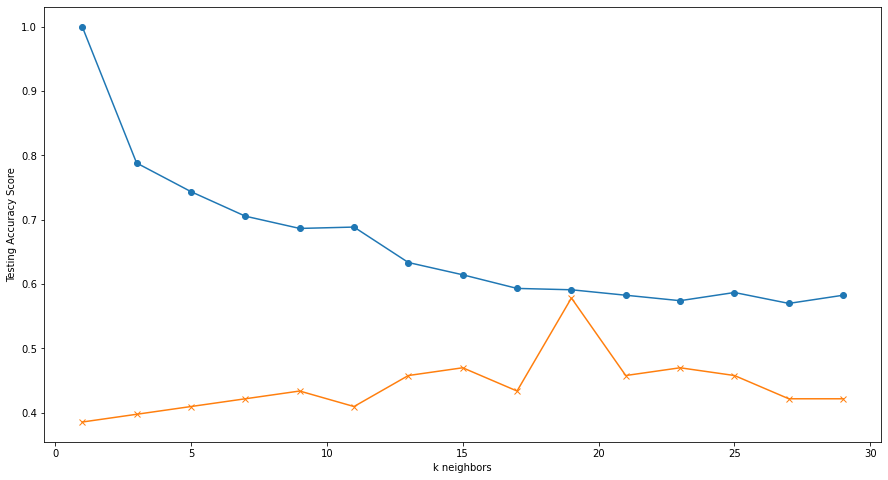

In [120]:
#Visualize
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [121]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
# Create the GridSearchCV model
param_grid = {
    'n_estimators': np.linspace(10, 400).astype(int),
    'max_depth': [None] + list(np.linspace(1, 5).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 200, 500).astype(int)),
    'min_samples_split': [2, 5, 10, 20, 30],
    'bootstrap': [True, False],
    'class_weight':['balanced', None]
}
grid = GridSearchCV(model1, param_grid, verbose=3)

In [ ]:
# Train the model with GridSearch
grid.fit(X_train, y_train)

In [71]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1.0, 'gamma': 'scale'}
0.6808988764044944


In [ ]:
model1.get_params().keys()

In [78]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'min_samples_split': [1.0, 2.0, 3.0],
              'n_estimators': [10, 50, 100, 150, 200],
              'criterion':['gini', 'entropy']
             }
grid = GridSearchCV(model5, param_grid)

In [79]:
# Train the model with GridSearch
grid.fit(X_train, y_train)

/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [1.0, 2.0, 3.0],
                         'n_estimators': [10, 50, 100, 150, 200]})

In [80]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'min_samples_split': 1.0, 'n_estimators': 10}
0.5180286006128704


In [94]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [95]:
from matplotlib.colors import Normalize
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

ValueError: cannot reshape array of size 30 into shape (13,14)

In [38]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)
print('Test Acc: %.3f' % grid.score(X_test, y_test))

Test Acc: 0.640


In [39]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["High Consumption","Medium Consumption","Low Consumption"]))

                    precision    recall  f1-score   support

  High Consumption       0.64      0.87      0.74        62
Medium Consumption       0.64      0.92      0.75        38
   Low Consumption       0.00      0.00      0.00        39

          accuracy                           0.64       139
         macro avg       0.43      0.60      0.50       139
      weighted avg       0.46      0.64      0.54       139



/Users/jildiz/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
# We can weight the features by their importance for more tuning purpose
sorted_features=sorted(zip(model5.feature_importances_, X.columns), reverse=True)[:10]
sorted_features

[(0.34678485561348577, 'US Population'),
 (0.25977937306028853, 'Crude Oil Imports'),
 (0.23287796792940166, 'Crude Oil Production (1000 Barrels)'),
 (0.1605578033968239, 'Crude Oil Exports(1000 Barrels)')]

Text(0, 0.5, 'Importance Level')

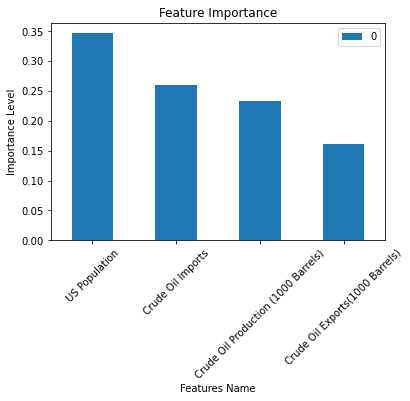

In [41]:
#Can be visualized in bar graph for analysis reason (feature weight)
ax=pd.DataFrame(sorted_features).plot.bar(x=1,y=0, rot=45, title="Feature Importance")
ax.set_xlabel("Features Name")
ax.set_ylabel("Importance Level")